In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
crimedata = 'data/Santa_Clara_County_Sheriff_s_Office_2016-2017.csv'

### Read in data `read_csv` is most flexible, also see `read_excel` and `read_fwf`

In [2]:
indf = pd.read_csv(crimedata)

In [3]:
# look at the top rows -- notice it read in columns
indf.head()

incident_datetime  incident_id case_number     incident_datetime.1  \
0  2016-06-18 01:50:46    762597294  S161700025  06/18/2016 01:50:46 AM   
1  2016-06-18 01:55:27    762597293  S161700026  06/18/2016 01:55:27 AM   
2  2016-06-18 02:07:30    762597292  S161700027  06/18/2016 02:07:30 AM   
3  2016-06-18 02:08:13    762597291  S161700028  06/18/2016 02:08:13 AM   
4  2016-06-18 02:11:00    762597290  S161700029  06/18/2016 02:11:00 AM   

  incident_type_primary                               incident_description  \
0       Pedestrian Stop  Call Type: 1095 <br>Description: PEDESTRIAN ST...   
1    Community Policing  Call Type: PATCK <br>Description: PATROL CHECK...   
2               Traffic  Call Type: 23152 <br>Description: MISDEMEANOR ...   
3                 Other  Call Type: 1154 <br>Description: SUSPICIOUS VE...   
4       Pedestrian Stop  Call Type: 1095 <br>Description: PEDESTRIAN ST...   

   clearance_type                 address_1  address_2                city  \
0             NaN                W DUNNE AV        NaN  SANTA CLARA COUNTY   
1             NaN                BURNETT AV        NaN  SANTA CLARA COUNTY   
2             NaN            EL CAMINO REAL        NaN  SANTA CLARA COUNTY   
3             NaN  14000 Block PAGE MILL RD        NaN  SANTA CLARA COUNTY   
4             NaN        STEVENS CREEK BLVD        NaN  SANTA CLARA COUNTY   

                      ...                     country   latitude   longitude  \
0                     ...                         NaN  37.125278 -121.649027   
1                     ...                         NaN  37.163104 -121.661207   
2                     ...                         NaN  37.432465 -122.153537   
3                     ...                         NaN  37.384929 -122.164360   
4                     ...                         NaN  37.322955 -122.022169   

               created_at              updated_at  \
0  06/19/2016 06:21:04 AM  06/25/2016 08:31:26 AM   
1  06/19/2016 06:21:04 AM  06/25/2016 08:31:26 AM   
2  06/19/2016 06:21:04 AM  06/25/2016 08:31:26 AM   
3  06/19/2016 06:21:04 AM  06/25/2016 08:31:27 AM   
4  06/19/2016 06:21:04 AM  06/25/2016 08:31:27 AM   

                                     location hour_of_day day_of_week  \
0  POINT (-121.649027382508 37.1252776960244)           1    Saturday   
1  POINT (-121.661207382967 37.1631037628581)           1    Saturday   
2  POINT (-122.153536709011 37.4324646764186)           2    Saturday   
3  POINT (-122.164360157798 37.3849293292592)           2    Saturday   
4   POINT (-122.022169203125 37.322954659466)           2    Saturday   

   parent_incident_type                                    geometry  
0    Proactive Policing  POINT (-121.649027382508 37.1252776960244)  
1    Proactive Policing  POINT (-121.661207382967 37.1631037628581)  
2               Traffic  POINT (-122.153536709011 37.4324646764186)  
3                 Other  POINT (-122.164360157798 37.3849293292592)  
4    Proactive Policing   POINT (-122.022169203125 37.322954659466)  

[5 rows x 22 columns]

In [4]:
indf.columns

Index(['incident_datetime', 'incident_id', 'case_number',
       'incident_datetime.1', 'incident_type_primary', 'incident_description',
       'clearance_type', 'address_1', 'address_2', 'city', 'state', 'zip',
       'country', 'latitude', 'longitude', 'created_at', 'updated_at',
       'location', 'hour_of_day', 'day_of_week', 'parent_incident_type',
       'geometry'],
      dtype='object')

In [5]:
indf['address_2'].unique()

array([ nan])

# Boring! `address_2` is all `NaN`. Let's drop this column

## Note -- the `0th` axis is rows, and the `1st` axis is columns

In [6]:
indf.drop('address_2', axis=1).head()

incident_datetime  incident_id case_number     incident_datetime.1  \
0  2016-06-18 01:50:46    762597294  S161700025  06/18/2016 01:50:46 AM   
1  2016-06-18 01:55:27    762597293  S161700026  06/18/2016 01:55:27 AM   
2  2016-06-18 02:07:30    762597292  S161700027  06/18/2016 02:07:30 AM   
3  2016-06-18 02:08:13    762597291  S161700028  06/18/2016 02:08:13 AM   
4  2016-06-18 02:11:00    762597290  S161700029  06/18/2016 02:11:00 AM   

  incident_type_primary                               incident_description  \
0       Pedestrian Stop  Call Type: 1095 <br>Description: PEDESTRIAN ST...   
1    Community Policing  Call Type: PATCK <br>Description: PATROL CHECK...   
2               Traffic  Call Type: 23152 <br>Description: MISDEMEANOR ...   
3                 Other  Call Type: 1154 <br>Description: SUSPICIOUS VE...   
4       Pedestrian Stop  Call Type: 1095 <br>Description: PEDESTRIAN ST...   

   clearance_type                 address_1                city state  \
0             NaN                W DUNNE AV  SANTA CLARA COUNTY    CA   
1             NaN                BURNETT AV  SANTA CLARA COUNTY    CA   
2             NaN            EL CAMINO REAL  SANTA CLARA COUNTY    CA   
3             NaN  14000 Block PAGE MILL RD  SANTA CLARA COUNTY    CA   
4             NaN        STEVENS CREEK BLVD  SANTA CLARA COUNTY    CA   

                      ...                      country   latitude   longitude  \
0                     ...                          NaN  37.125278 -121.649027   
1                     ...                          NaN  37.163104 -121.661207   
2                     ...                          NaN  37.432465 -122.153537   
3                     ...                          NaN  37.384929 -122.164360   
4                     ...                          NaN  37.322955 -122.022169   

               created_at              updated_at  \
0  06/19/2016 06:21:04 AM  06/25/2016 08:31:26 AM   
1  06/19/2016 06:21:04 AM  06/25/2016 08:31:26 AM   
2  06/19/2016 06:21:04 AM  06/25/2016 08:31:26 AM   
3  06/19/2016 06:21:04 AM  06/25/2016 08:31:27 AM   
4  06/19/2016 06:21:04 AM  06/25/2016 08:31:27 AM   

                                     location hour_of_day  day_of_week  \
0  POINT (-121.649027382508 37.1252776960244)           1     Saturday   
1  POINT (-121.661207382967 37.1631037628581)           1     Saturday   
2  POINT (-122.153536709011 37.4324646764186)           2     Saturday   
3  POINT (-122.164360157798 37.3849293292592)           2     Saturday   
4   POINT (-122.022169203125 37.322954659466)           2     Saturday   

  parent_incident_type                                    geometry  
0   Proactive Policing  POINT (-121.649027382508 37.1252776960244)  
1   Proactive Policing  POINT (-121.661207382967 37.1631037628581)  
2              Traffic  POINT (-122.153536709011 37.4324646764186)  
3                Other  POINT (-122.164360157798 37.3849293292592)  
4   Proactive Policing   POINT (-122.022169203125 37.322954659466)  

[5 rows x 21 columns]

In [7]:
indf.head()

incident_datetime  incident_id case_number     incident_datetime.1  \
0  2016-06-18 01:50:46    762597294  S161700025  06/18/2016 01:50:46 AM   
1  2016-06-18 01:55:27    762597293  S161700026  06/18/2016 01:55:27 AM   
2  2016-06-18 02:07:30    762597292  S161700027  06/18/2016 02:07:30 AM   
3  2016-06-18 02:08:13    762597291  S161700028  06/18/2016 02:08:13 AM   
4  2016-06-18 02:11:00    762597290  S161700029  06/18/2016 02:11:00 AM   

  incident_type_primary                               incident_description  \
0       Pedestrian Stop  Call Type: 1095 <br>Description: PEDESTRIAN ST...   
1    Community Policing  Call Type: PATCK <br>Description: PATROL CHECK...   
2               Traffic  Call Type: 23152 <br>Description: MISDEMEANOR ...   
3                 Other  Call Type: 1154 <br>Description: SUSPICIOUS VE...   
4       Pedestrian Stop  Call Type: 1095 <br>Description: PEDESTRIAN ST...   

   clearance_type                 address_1  address_2                city  \
0             NaN                W DUNNE AV        NaN  SANTA CLARA COUNTY   
1             NaN                BURNETT AV        NaN  SANTA CLARA COUNTY   
2             NaN            EL CAMINO REAL        NaN  SANTA CLARA COUNTY   
3             NaN  14000 Block PAGE MILL RD        NaN  SANTA CLARA COUNTY   
4             NaN        STEVENS CREEK BLVD        NaN  SANTA CLARA COUNTY   

                      ...                     country   latitude   longitude  \
0                     ...                         NaN  37.125278 -121.649027   
1                     ...                         NaN  37.163104 -121.661207   
2                     ...                         NaN  37.432465 -122.153537   
3                     ...                         NaN  37.384929 -122.164360   
4                     ...                         NaN  37.322955 -122.022169   

               created_at              updated_at  \
0  06/19/2016 06:21:04 AM  06/25/2016 08:31:26 AM   
1  06/19/2016 06:21:04 AM  06/25/2016 08:31:26 AM   
2  06/19/2016 06:21:04 AM  06/25/2016 08:31:26 AM   
3  06/19/2016 06:21:04 AM  06/25/2016 08:31:27 AM   
4  06/19/2016 06:21:04 AM  06/25/2016 08:31:27 AM   

                                     location hour_of_day day_of_week  \
0  POINT (-121.649027382508 37.1252776960244)           1    Saturday   
1  POINT (-121.661207382967 37.1631037628581)           1    Saturday   
2  POINT (-122.153536709011 37.4324646764186)           2    Saturday   
3  POINT (-122.164360157798 37.3849293292592)           2    Saturday   
4   POINT (-122.022169203125 37.322954659466)           2    Saturday   

   parent_incident_type                                    geometry  
0    Proactive Policing  POINT (-121.649027382508 37.1252776960244)  
1    Proactive Policing  POINT (-121.661207382967 37.1631037628581)  
2               Traffic  POINT (-122.153536709011 37.4324646764186)  
3                 Other  POINT (-122.164360157798 37.3849293292592)  
4    Proactive Policing   POINT (-122.022169203125 37.322954659466)  

[5 rows x 22 columns]

## It's common for pandas to return a view to the dataframe when you operate on it

## If you want to change the underlying dataframe you can either say:
```
indf.drop('address_2', axis=1, inplace=True)
```
## or reassign the results to a new dataframe
```
indf = indf.drop('address_2', axis=1)
```


In [8]:
indf.drop('address_2', axis=1, inplace=True)

## We can also selectmultiple columns by passing a list

In [9]:
indf[['address_1','city']].head()

address_1                city
0                W DUNNE AV  SANTA CLARA COUNTY
1                BURNETT AV  SANTA CLARA COUNTY
2            EL CAMINO REAL  SANTA CLARA COUNTY
3  14000 Block PAGE MILL RD  SANTA CLARA COUNTY
4        STEVENS CREEK BLVD  SANTA CLARA COUNTY

In [10]:
type(indf['incident_id'])

pandas.core.series.Series

In [11]:
indf['incident_datetime'].head()

0    2016-06-18 01:50:46
1    2016-06-18 01:55:27
2    2016-06-18 02:07:30
3    2016-06-18 02:08:13
4    2016-06-18 02:11:00
Name: incident_datetime, dtype: object

### Need to force `incident_datetime` to be actual datetime data

In [12]:
indf.incident_datetime = pd.to_datetime(indf.incident_datetime)

In [13]:
indf.incident_datetime.describe()

count                  163203
unique                 163177
top       2017-03-02 08:20:01
freq                        2
first     2016-01-01 00:02:35
last      2017-07-06 01:06:14
Name: incident_datetime, dtype: object

## Pandas has an index. Let's use the date for that --- powerful!

In [15]:
indf.index = indf.incident_datetime

In [16]:
indf.head()

incident_datetime  incident_id case_number  \
incident_datetime                                                  
2016-06-18 01:50:46 2016-06-18 01:50:46    762597294  S161700025   
2016-06-18 01:55:27 2016-06-18 01:55:27    762597293  S161700026   
2016-06-18 02:07:30 2016-06-18 02:07:30    762597292  S161700027   
2016-06-18 02:08:13 2016-06-18 02:08:13    762597291  S161700028   
2016-06-18 02:11:00 2016-06-18 02:11:00    762597290  S161700029   

                        incident_datetime.1 incident_type_primary  \
incident_datetime                                                   
2016-06-18 01:50:46  06/18/2016 01:50:46 AM       Pedestrian Stop   
2016-06-18 01:55:27  06/18/2016 01:55:27 AM    Community Policing   
2016-06-18 02:07:30  06/18/2016 02:07:30 AM               Traffic   
2016-06-18 02:08:13  06/18/2016 02:08:13 AM                 Other   
2016-06-18 02:11:00  06/18/2016 02:11:00 AM       Pedestrian Stop   

                                                  incident_description  \
incident_datetime                                                        
2016-06-18 01:50:46  Call Type: 1095 <br>Description: PEDESTRIAN ST...   
2016-06-18 01:55:27  Call Type: PATCK <br>Description: PATROL CHECK...   
2016-06-18 02:07:30  Call Type: 23152 <br>Description: MISDEMEANOR ...   
2016-06-18 02:08:13  Call Type: 1154 <br>Description: SUSPICIOUS VE...   
2016-06-18 02:11:00  Call Type: 1095 <br>Description: PEDESTRIAN ST...   

                     clearance_type                 address_1  \
incident_datetime                                               
2016-06-18 01:50:46             NaN                W DUNNE AV   
2016-06-18 01:55:27             NaN                BURNETT AV   
2016-06-18 02:07:30             NaN            EL CAMINO REAL   
2016-06-18 02:08:13             NaN  14000 Block PAGE MILL RD   
2016-06-18 02:11:00             NaN        STEVENS CREEK BLVD   

                                   city state  \
incident_datetime                               
2016-06-18 01:50:46  SANTA CLARA COUNTY    CA   
2016-06-18 01:55:27  SANTA CLARA COUNTY    CA   
2016-06-18 02:07:30  SANTA CLARA COUNTY    CA   
2016-06-18 02:08:13  SANTA CLARA COUNTY    CA   
2016-06-18 02:11:00  SANTA CLARA COUNTY    CA   

                                        ...                      country  \
incident_datetime                       ...                                
2016-06-18 01:50:46                     ...                          NaN   
2016-06-18 01:55:27                     ...                          NaN   
2016-06-18 02:07:30                     ...                          NaN   
2016-06-18 02:08:13                     ...                          NaN   
2016-06-18 02:11:00                     ...                          NaN   

                      latitude   longitude              created_at  \
incident_datetime                                                    
2016-06-18 01:50:46  37.125278 -121.649027  06/19/2016 06:21:04 AM   
2016-06-18 01:55:27  37.163104 -121.661207  06/19/2016 06:21:04 AM   
2016-06-18 02:07:30  37.432465 -122.153537  06/19/2016 06:21:04 AM   
2016-06-18 02:08:13  37.384929 -122.164360  06/19/2016 06:21:04 AM   
2016-06-18 02:11:00  37.322955 -122.022169  06/19/2016 06:21:04 AM   

                                 updated_at  \
incident_datetime                             
2016-06-18 01:50:46  06/25/2016 08:31:26 AM   
2016-06-18 01:55:27  06/25/2016 08:31:26 AM   
2016-06-18 02:07:30  06/25/2016 08:31:26 AM   
2016-06-18 02:08:13  06/25/2016 08:31:27 AM   
2016-06-18 02:11:00  06/25/2016 08:31:27 AM   

                                                       location hour_of_day  \
incident_datetime                                                             
2016-06-18 01:50:46  POINT (-121.649027382508 37.1252776960244)           1   
2016-06-18 01:55:27  POINT (-121.661207382967 37.1631037628581)           1   
2016-06-18 02:07:30  POINT (-122.153536709011 37.4324646764186)         

In [17]:
indf_summary = indf.describe()

In [18]:
indf_summary

incident_id  clearance_type           zip  country       latitude  \
count  1.632030e+05             0.0     56.000000      0.0  163203.000000   
mean   7.769574e+08             NaN  94846.232143      NaN      37.292972   
std    2.005988e+07             NaN    421.457384      NaN       0.093556   
min    7.426705e+08             NaN  94022.000000      NaN      36.841572   
25%    7.597006e+08             NaN  94905.000000      NaN      37.274502   
50%    7.749470e+08             NaN  95051.000000      NaN      37.319867   
75%    7.950983e+08             NaN  95114.250000      NaN      37.346987   
max    8.116175e+08             NaN  95133.000000      NaN      37.532565   

           longitude    hour_of_day  
count  163203.000000  163203.000000  
mean     -121.915034      13.013603  
std         0.147420       6.373492  
min      -122.236355       0.000000  
25%      -122.027128       9.000000  
50%      -121.930941      13.000000  
75%      -121.831638      18.000000  
max      -121.214236      23.000000

In [19]:
indf.parent_incident_type.unique()

array(['Proactive Policing', 'Traffic', 'Other', 'Quality of Life',
       'Theft', 'Breaking & Entering', 'Theft from Vehicle', 'Assault',
       'Property Crime', 'Robbery', 'Theft of Vehicle', 'Sexual Offense',
       'Vehicle Recovery', 'Unknown', 'Homicide'], dtype=object)

In [20]:
indf.incident_type_primary.unique()

array(['Pedestrian Stop', 'Community Policing', 'Traffic', 'Other',
       'Vehicle Stop', 'Alarm', 'Disorder', 'Missing Person', 'Drugs',
       'Theft', 'Breaking & Entering', 'Family Offense',
       'Theft from Vehicle', 'Assault', 'Property Crime', 'Robbery',
       'Death', 'Theft of Vehicle', 'Weapons Offense',
       'Other Sexual Offense', 'Vehicle Recovery',
       'Assault with Deadly Weapon', 'Liquor', 'Arson', 'Kidnapping',
       'Sexual Assault', 'Homicide'], dtype=object)

In [21]:
indf.incident_description.unique()

array([ 'Call Type: 1095 <br>Description: PEDESTRIAN STOP<br>Final Disposition: N',
       'Call Type: PATCK <br>Description: PATROL CHECK<br>Final Disposition: N',
       'Call Type: 23152 <br>Description: MISDEMEANOR DUI<br>Final Disposition: R',
       'Call Type: 1154 <br>Description: SUSPICIOUS VEHICLE<br>Final Disposition: T',
       'Call Type: 1195 <br>Description: VEHICLE STOP<br>Final Disposition: N',
       'Call Type: WELCK <br>Description: WELFARE CHECK<br>Final Disposition: R',
       'Call Type: 1033A <br>Description: ALARM, AUDIBLE<br>Final Disposition: N',
       'Call Type: 1195 <br>Description: VEHICLE STOP<br>Final Disposition: T',
       'Call Type: 1195 <br>Description: VEHICLE STOP<br>Final Disposition: F',
       'Call Type: 415E <br>Description: DISTURBANCE, EXCESSIVE NOISE<br>Final Disposition: N',
       'Call Type: 1033S <br>Description: ALARM, SILENT<br>Final Disposition: N',
       'Call Type: 415 <br>Description: DISTURBANCE<br>Final Disposition: N',
    

## We can parse the data in a column using string manipulation

In [22]:
indf['short_description'] = [i.split('<br>')[1].replace('Description:','').strip() for i in indf.incident_description]

In [23]:
indf.short_description.unique()

array(['PEDESTRIAN STOP', 'PATROL CHECK', 'MISDEMEANOR DUI',
       'SUSPICIOUS VEHICLE', 'VEHICLE STOP', 'WELFARE CHECK',
       'ALARM, AUDIBLE', 'DISTURBANCE, EXCESSIVE NOISE', 'ALARM, SILENT',
       'DISTURBANCE', 'VEHICLE ACCIDENT, PROPERTY DAMAGE',
       'ABANDONED VEHICLE', 'UNKNOWN TYPE 911 CALL',
       'FOUND, MISSING PERSON', 'MISCELLANEOUS TOW REQUEST', 'NARCOTICS',
       'SUSPICIOUS CIRCUMSTANCES', 'THEFT', 'BURGLARY (460)',
       'DRUNK IN PUBLIC', 'DISTURBANCE, FIGHT', 'DISTURBANCE, UNKNOWN',
       'MISDEMEANOR WANT', 'DOMESTIC VIOLENCE', 'MEET THE CITIZEN',
       'PARKING VIOLATION', 'SPEEDING', 'T/C, MINOR INJURIES',
       'RECKLESS DRIVING', 'TRAFFIC HAZARD', 'GRAND THEFT',
       'SUSPICIOUS PERSON', 'CHILD ABUSE', 'VEHICLE BURGLARY',
       'MUNICIPAL CODE VIOLATION', 'NOISY ANIMAL', 'PERSON DOWN',
       'ASSAULT AND BATTERY', 'INJURED ANIMAL', 'FOUND PROPERTY',
       'MISSING JUVENILE', 'MENTALLY DISTURBED PERSON',
       'UNKNOWN CIRCUMSTANCES', 'IDENTIFI

In [24]:
indf.short_description.value_counts()[:25].plot(kind='bar')

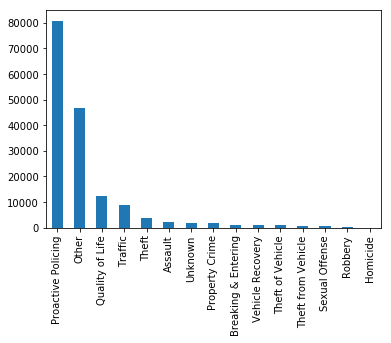

In [25]:
indf.parent_incident_type.value_counts()[:25].plot(kind='bar')

# We can make subsets of the dataframe -- using `loc` is the best way

## `loc` uses a boolean array to select

In [ ]:
['CAMINO' in str(i) for i in indf.address_1];

## What's going on on El Camino?

In [ ]:
indf.address_1.count()

In [ ]:
indf.loc[['CAMINO' in str(i) for i in indf.address_1]].address_1.count()

In [ ]:
indf.short_description.value_counts()[:25].plot(kind='bar')

In [ ]:
indf.loc[['CAMINO' in str(i) for i in indf.address_1]].short_description.value_counts()[:25].plot(kind='bar')

In [ ]:
day_order = ['Monday','Tuesday','Wednesday',
             'Thursday','Friday','Saturday','Sunday']

In [ ]:
indf_tmp = indf.loc[indf.short_description=="SOLICITING FOR PROSTITUTION"].copy()
indf_tmp.day_of_week.value_counts().loc[day_order].plot(kind='bar')

In [ ]:
indf_tmp = indf.loc[indf.incident_type_primary=="Breaking & Entering"].copy()
indf_tmp.day_of_week.value_counts().loc[day_order].plot(kind='bar')

In [ ]:
for cn,cg in indf.groupby(indf.index.year):
    plt.figure()
    cg.groupby(cg.index.date).count()['case_number'].plot(rot=45)

In [ ]:
tmpdf = indf.loc[indf.short_description=='TREE DOWN']
for cn,cg in tmpdf.groupby(tmpdf.index.year):
    plt.figure()
    cg.groupby(cg.index.date).count()['case_number'].plot(rot=45)

In [ ]:
with PdfPages('Crimes_by_day.pdf') as outpdf:
    for cn, cg in indf.groupby('parent_incident_type'):
        print ('making figure for {0}'.format(cn))
        plt.figure()
        cg.day_of_week.value_counts().loc[day_order].plot(kind='bar')
        plt.title(cn)
        plt.tight_layout()
        outpdf.savefig()
        plt.close('all')     

In [ ]:
with PdfPages('Crimes_by_day_refined.pdf') as outpdf:
    for cn, cg in indf.groupby(['short_description',indf.index.year]):
        print ('making figure for {0}'.format(cn))
        plt.figure()
        cg.day_of_week.value_counts().loc[day_order].plot(kind='bar')
        plt.title(cn)
        plt.tight_layout()
        outpdf.savefig()
        plt.close('all')     

## We could limit to only categories with a minimum number of incidents reported

In [ ]:
with PdfPages('Crimes_by_day_refined_gt_1000.pdf') as outpdf:
    for cn, cg in indf.groupby(['short_description',indf.index.year]):
        if len(cg) > 1000:
            print ('making figure for {0}'.format(cn))
            plt.figure()
            cg.day_of_week.value_counts().loc[day_order].plot(kind='bar')
            plt.title(cn)
            plt.tight_layout()
            outpdf.savefig()
            plt.close('all') 